# **Analysis and prediction of Health Insurance Data**

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Importing dataset

In [2]:
dataset = pd.read_csv('./dataset/Health_insurance.csv')

# Data description

In [3]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
dataset['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

# Preprocessing

we need to convert the categorical featuress into numerical, we will use label encoder to do the job

In [7]:
df = dataset.copy()
for col_name in dataset.select_dtypes('object'):
  df[col_name] = LabelEncoder().fit_transform(dataset[col_name])

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


# EDA

Let's start with basic visualization, first we will look at age vs charges graph

[Text(0.5, 1.0, 'Age vs Charges')]

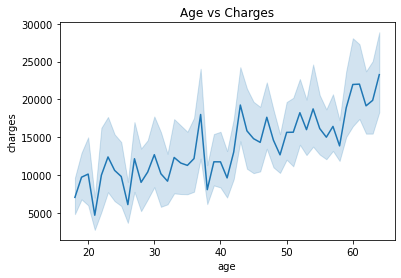

In [8]:
sns.lineplot(x=df.age, y=df.charges, data= df).set(title='Age vs Charges')

Charges increase with age, butt he graph doesn't look linear, there is some feature that is affecting

Let us try to identify them

First let us look at the smoker feature

In [9]:
val = list(df.smoker.value_counts()/len(df))
print(val)

[0.7952167414050823, 0.20478325859491778]


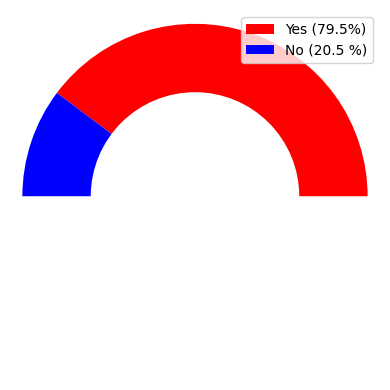

In [10]:
labels = ['Yes (79.5%)','No (20.5 %)']
colors = ['red', 'blue',"white"]
fig = plt.figure(figsize=(4,4),dpi=100)
val.append(sum(val))
ax = fig.add_subplot(1,1,1)
ax.pie(val, colors=colors)
ax.add_artist(plt.Circle((0, 0), 0.6, color='white'))
plt.legend( labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

dataset is of 79.5% smokers and 20.5% non smokers, let'see if this feature has influence over charges 

[Text(0.5, 1.0, 'Smoker vs Charges')]

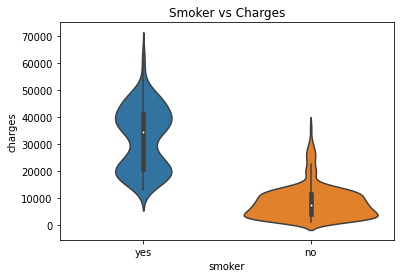

In [11]:
sns.violinplot(data=dataset, x='smoker', y='charges').set(title='Smoker vs Charges')

There's huge variation in charges between smoker and non smoker, charges density for non smoker ends at 20,000 while charges for smoker starts at 20,000

Let's see charges over age for smoker and non smoker

[Text(0.5, 1.0, 'Age vs Charges')]

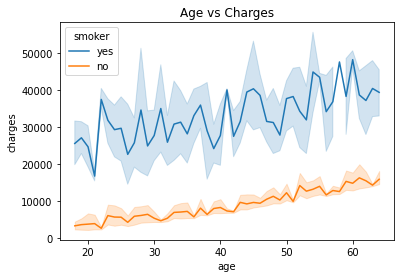

In [12]:
sns.lineplot(x=df.age, y=df.charges, hue=dataset.smoker, data= dataset).set(title='Age vs Charges')

Charges for smoker is very high compared to non smoker

let's see smokers region wise and check it's effect on charges

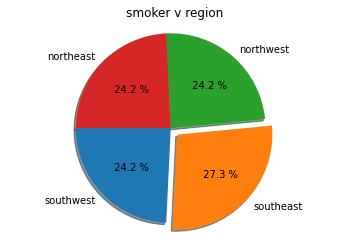

In [13]:
labels = dataset['region'].unique()
sizes = [24, 27, 24, 24]
explode = (0, 0.1, 0, 0)
  
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode = explode,
        labels = labels, autopct ='% 1.1f %%',
        shadow = True, startangle = 180)
ax1.axis('equal')
  
ax1.set_title('smoker v region')
plt.show()

smokers are 3% more in southeast region

[Text(0.5, 1.0, 'Region vs Charges')]

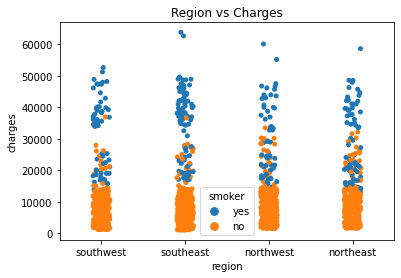

In [14]:
sns.stripplot(data=dataset, x='region', y='charges', hue=dataset.smoker).set(title='Region vs Charges')

Smokers in southeast region pays higher than other region, but still the difference is not very huge.

So let us check bmi vs smokers

[Text(0.5, 1.0, 'Sex vs BMI')]

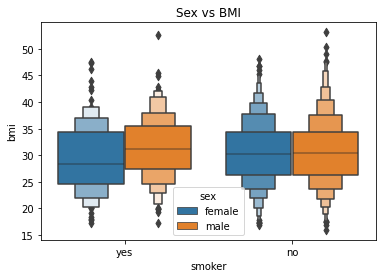

In [15]:
sns.boxenplot(data=dataset, x='smoker', y='bmi', hue='sex').set(title='Sex vs BMI')

There is no significant difference in bmi for smokers and non smokers

Let's take next feature (i.e.,) Children

[Text(0.5, 1.0, 'Children vs Charges')]

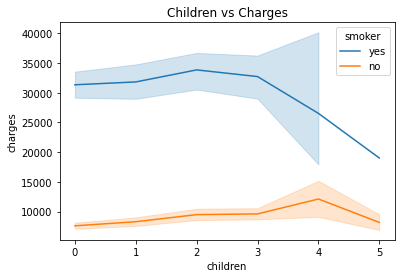

In [16]:
sns.lineplot(data=dataset, x='children', y='charges', hue='smoker').set(title='Children vs Charges')

Smokers with more than 3 children pay lesser than those with lesser 3 children, whereas non smokers with more than 3 children pay higher than their counterparts.

Number of chilren might affect charges, but there might be another factor that is contributing to this, so let us look at BMI vs children

[Text(0.5, 1.0, 'Children vs BMI')]

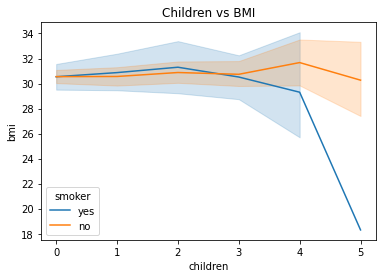

In [17]:
sns.lineplot(data=dataset, x='children', y='bmi', hue='smoker').set(title='Children vs BMI')

[Text(0.5, 1.0, 'Children vs BMI')]

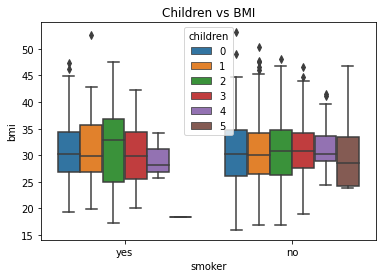

In [18]:
sns.boxplot(data=dataset, x='smoker', y='bmi', hue='children').set(title='Children vs BMI')

BMI of smokers with more than 3 children is optimal (18.5 - 24.9) thus the charges are less and not just because of children. 

we can check this by plotting the charges vs age for people with less than children

[Text(0.5, 1.0, 'Age vs Charges for people with 0-3 children')]

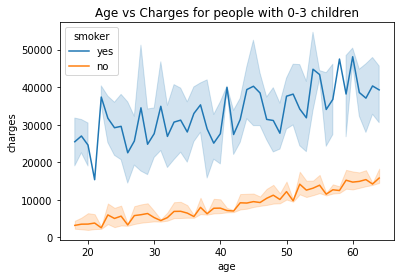

In [19]:
children3 =  dataset[dataset['children']<=3]
sns.lineplot(x='age', y='charges', hue='smoker', data= children3).set(title='Age vs Charges for people with 0-3 children')


[Text(0.5, 1.0, 'Age vs Charges for people with 3-5 children')]

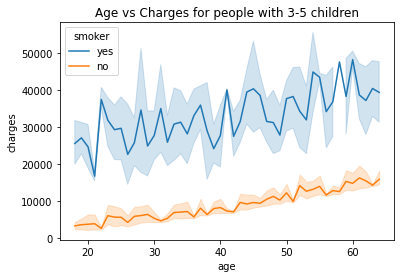

In [20]:
sns.lineplot(x=df.age, y=df.charges, hue=dataset.smoker, data= dataset).set(title='Age vs Charges for people with 3-5 children')

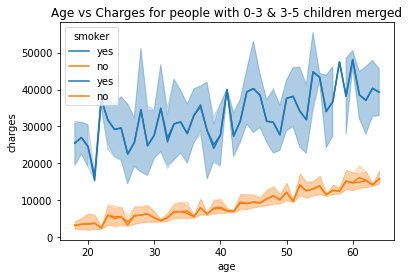

In [21]:
sns.lineplot(x='age', y='charges', hue='smoker', data= children3).set(title='Age vs Charges for people with 0-3 & 3-5 children merged');
sns.lineplot(x=df.age, y=df.charges, hue=dataset.smoker, data= dataset);

As we can see that charges doesn't have huge variation between persons irrespective of the number of children.

Thus we can conclude that children doesn't affect the charges

Now that we know BMI is the reason for the decrease in charges for smoker, we can plot BMI vs charges

[Text(0.5, 1.0, 'BMI vs charges')]

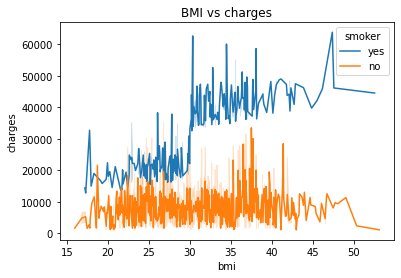

In [22]:
sns.lineplot(data=dataset,x='bmi',y='charges', hue='smoker').set(title='BMI vs charges')

BMI plays a very crucial role in deciding the charges.

Value 30 seems to be the threshold, let us split the dataset with the threshold to verify this

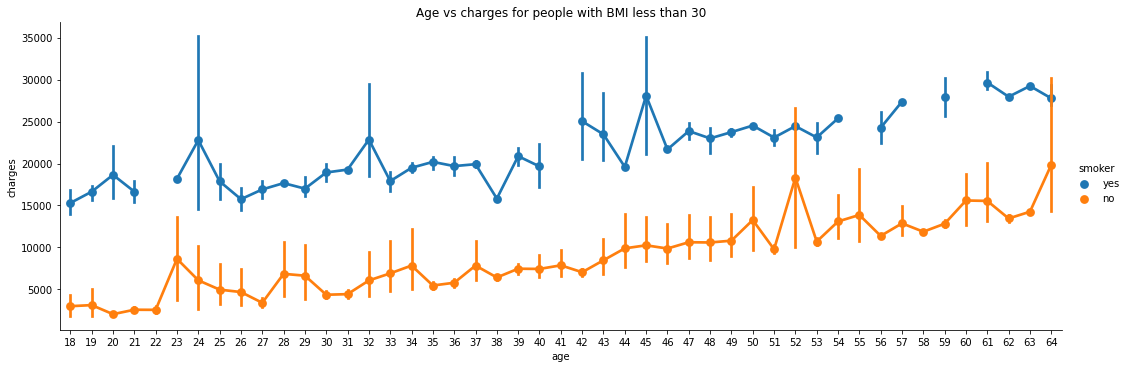

In [23]:
bmi1 = dataset[dataset['bmi']<=30]
bmi2 = dataset[dataset['bmi']>=30]
sns.catplot(x='age', y='charges', hue='smoker', data= bmi1, kind='point', aspect=3).set(title='Age vs charges for people with BMI less than 30')


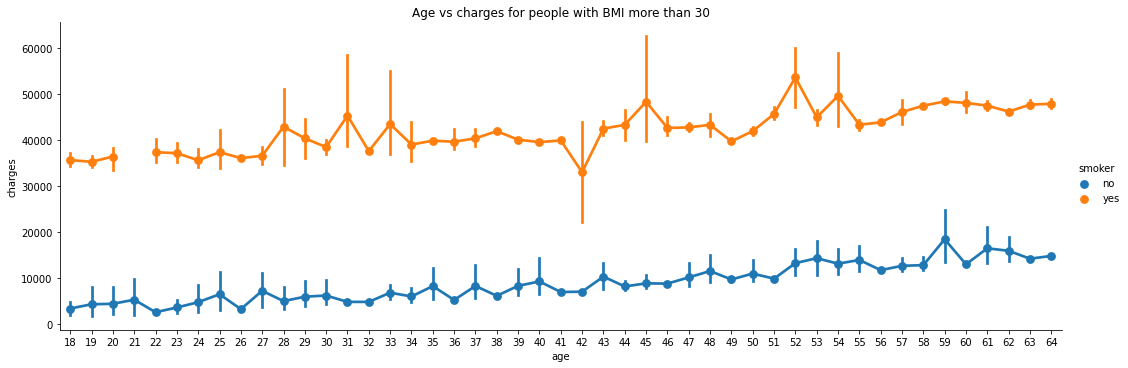

In [24]:
sns.catplot(x='age', y='charges', hue='smoker', data= bmi2, kind='point', aspect=3).set(title='Age vs charges for people with BMI more than 30')

Both the graphs are almost flat 

We can clearly see that charges for persons with BMI less than 30 ends at 25,000 whereas the charges for persons with BMI more than 30 starts at 35,000 

We have identified the features that influence the charges the most, they are:
1. Smoker
2. Age
3. BMI

We can verify this with Correlation plots

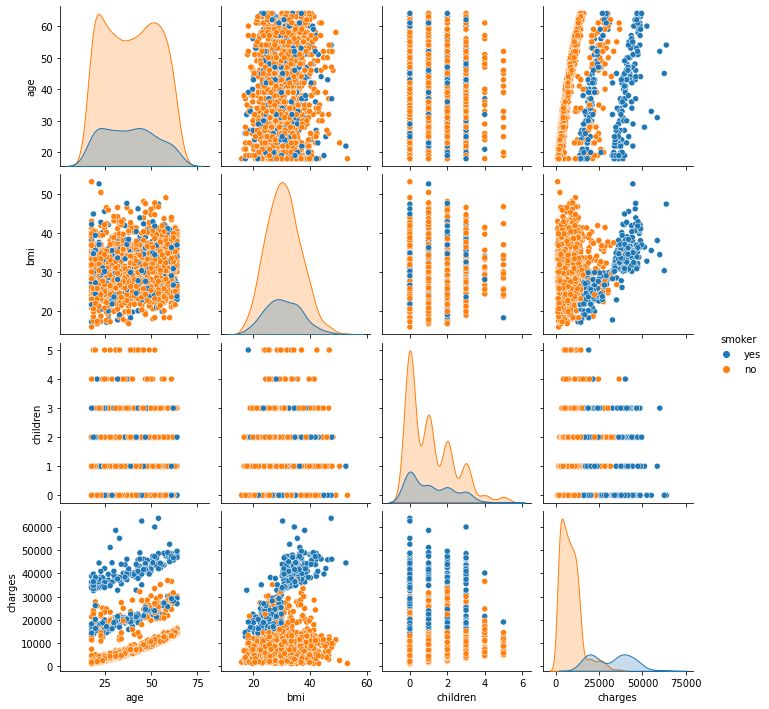

In [25]:
sns.pairplot(data=dataset,hue='smoker')

[Text(0.5, 1.0, 'Correlation Heatmap')]

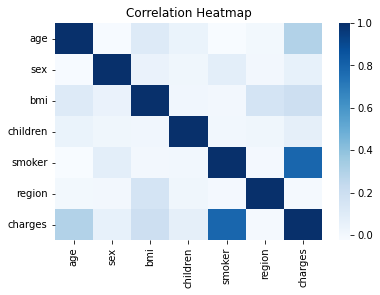

In [26]:
sns.heatmap(df.corr(),cmap='Blues').set(title='Correlation Heatmap')

From the Correlation Heatmap we can infer that smoker,age and bmi is highly correlated with charges

## Feature Selection

The prediction accuracy can be improved (sometimes) by shrinking or setting some parameters to zero.

In this notebook we will use Best subset selection.

Best subset regression finds for each  𝑚∈{0,1,2,…,𝑘}  the subset of size  𝑚  that gives smallest residual sum of squares (RSS). The question of how to choose  𝑚  involves the tradeoff between bias and variance. This is infeasible for  𝑘>>40.

In [27]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error

In [28]:
#Best selection method based on RSS
#some helper function 
def fit_linear_reg(X,y):
    #fit linear regression model and return RSS and r squared
    model_k = LinearRegression()
    model_k.fit(X,y)
    RSS = mean_squared_error(y,model_k.predict(X))*len(y) 
    R_squared = model_k.score(X,y) 
    adj_R_squared = 1 - (1-R_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
    return RSS, R_squared, adj_R_squared 

In [29]:
#import tqdm for progress bar 
from tqdm import tqdm_notebook
from tqdm.notebook import tnrange
import itertools

#Initialize variables 
y = df.charges
X = df.drop(columns='charges',axis=1) 

m = 11

RSS_list, R_squared_list, feature_list = [], [], []
adj_R_squared_list = []
numb_features = []

#looping over m=1 to m=7 features in X
#Looping over k = 1 to k = 17 features in X
for k in tnrange(1,len(X.columns) + 1, desc = 'Loop...'):

    #Looping over all possible combinations: 
    for combo in itertools.combinations(X.columns,k):
        tmp_result = fit_linear_reg(X[list(combo)],y)   #Store temp result 
        RSS_list.append(tmp_result[0])                  #Append lists
        R_squared_list.append(tmp_result[1])
        adj_R_squared_list.append(tmp_result[2])
        feature_list.append(combo)
        numb_features.append(len(combo))   

#Store in DataFrame
dfs = pd.DataFrame({'numb_features': numb_features,'RSS': RSS_list, 'R_squared':R_squared_list,'Adj_R_squared': adj_R_squared_list, 'features':feature_list})

Loop...:   0%|          | 0/6 [00:00<?, ?it/s]

In [30]:
df_min = dfs[dfs.groupby('numb_features')['RSS'].transform(min) == dfs['RSS']]
df_max = dfs[dfs.groupby('numb_features')['R_squared'].transform(max) == dfs['R_squared']]
df_max_adj = dfs[dfs.groupby('numb_features')['Adj_R_squared'].transform(max) == dfs['Adj_R_squared']]
display(df_min.head())
display(df_max_adj.head(10))

,numb_features,RSS,R_squared,Adj_R_squared,features
4,1,7.455432e+10,0.619765,0.619480,"(smoker,)"
9,2,5.462612e+10,0.721401,0.720983,"(age, smoker)"
26,3,4.951322e+10,0.747477,0.746909,"(age, bmi, smoker)"
47,4,4.907845e+10,0.749695,0.748943,"(age, bmi, children, smoker)"
60,5,4.887971e+10,0.750708,0.749772,"(age, bmi, children, smoker, region)"


,numb_features,RSS,R_squared,Adj_R_squared,features
4,1,7.455432e+10,0.619765,0.619480,"(smoker,)"
9,2,5.462612e+10,0.721401,0.720983,"(age, smoker)"
26,3,4.951322e+10,0.747477,0.746909,"(age, bmi, smoker)"
47,4,4.907845e+10,0.749695,0.748943,"(age, bmi, children, smoker)"
60,5,4.887971e+10,0.750708,0.749772,"(age, bmi, children, smoker, region)"
62,6,4.887401e+10,0.750737,0.749614,"(age, sex, bmi, children, smoker, region)"


In [31]:
dfs['min_RSS'] = dfs.groupby('numb_features')['RSS'].transform(min)
dfs['max_R_squared'] = dfs.groupby('numb_features')['R_squared'].transform(max)
dfs['max_Adj_R_squared'] = dfs.groupby('numb_features')['Adj_R_squared'].transform(max)
dfs.head()

,numb_features,RSS,R_squared,Adj_R_squared,features,min_RSS,max_R_squared,max_Adj_R_squared
0,1,1.785440e+11,0.089406,0.088724,"(age,)",7.455432e+10,0.619765,0.61948
1,1,1.954306e+11,0.003282,0.002536,"(sex,)",7.455432e+10,0.619765,0.61948
2,1,1.883608e+11,0.039339,0.038620,"(bmi,)",7.455432e+10,0.619765,0.61948
3,1,1.951676e+11,0.004624,0.003879,"(children,)",7.455432e+10,0.619765,0.61948
4,1,7.455432e+10,0.619765,0.619480,"(smoker,)",7.455432e+10,0.619765,0.61948


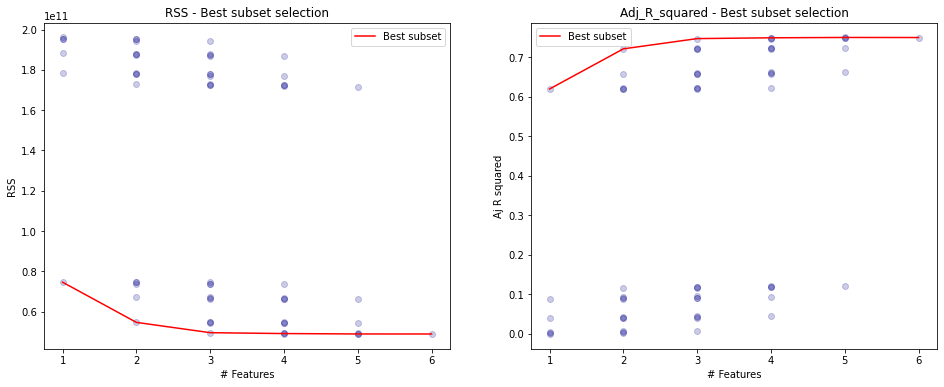

In [32]:
fig = plt.figure(figsize = (16,6))
ax = fig.add_subplot(1, 2, 1)

ax.scatter(dfs.numb_features,dfs.RSS, alpha = .2, color = 'darkblue' )
ax.set_xlabel('# Features')
ax.set_ylabel('RSS')
ax.set_title('RSS - Best subset selection')
ax.plot(dfs.numb_features,dfs.min_RSS,color = 'r', label = 'Best subset')
ax.legend()

ax = fig.add_subplot(1, 2, 2)
ax.scatter(dfs.numb_features,dfs.Adj_R_squared, alpha = .2, color = 'darkblue' )
ax.plot(dfs.numb_features,dfs.max_Adj_R_squared,color = 'r', label = 'Best subset')
ax.set_xlabel('# Features')
ax.set_ylabel('Aj R squared')
ax.set_title('Adj_R_squared - Best subset selection')
ax.legend()

plt.show()

From the plots we can select 3 features from the data, which are:
1. smoker
2. age
3. bmi

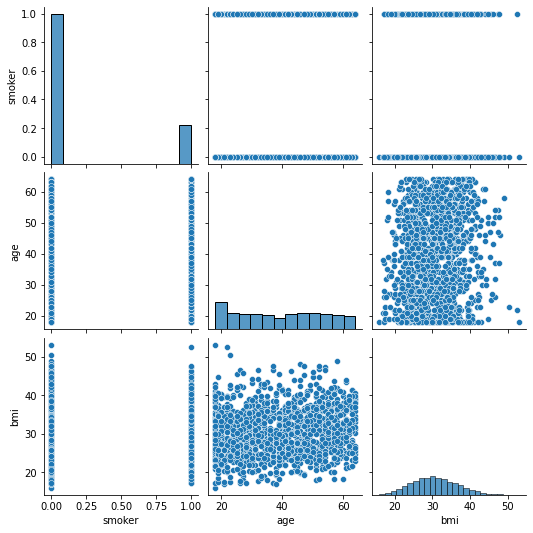

In [33]:
sns.pairplot(data=df[['smoker','age','bmi']])

## Model building

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df[['smoker','age','bmi']]
y = df.charges

scaler = StandardScaler()
X = scaler.fit_transform(X) #Standardizing the dataset for better performance

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)

In [35]:
model = LinearRegression() 
model.fit(Xtrain,ytrain)  

LinearRegression()

## Evaluation

In [36]:
print("Accuracy:")
print(f"\tTrain data: {round(model.score(Xtrain,ytrain)*100,2)}%")
print(f"\tTest data: {round(model.score(Xtest,ytest)*100,2)}%")

Accuracy:
	Train data: 74.11%
	Test data: 77.01%


In [37]:
yhat = model.predict(Xtest)
results= pd.DataFrame({"Ground Truth":ytest,"Charges Predicted":yhat})
results.head()

,Ground Truth,Charges Predicted
954,20009.63365,29503.615578
605,9283.56200,12647.573962
572,4753.63680,10453.607173
577,58571.07448,32295.027966
1309,6875.96100,9458.776961


<AxesSubplot:>

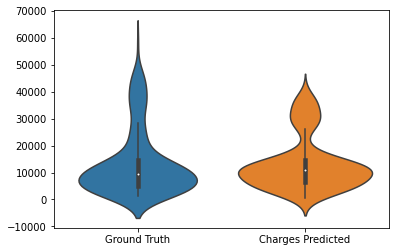

In [38]:
sns.violinplot(data=results,ci=False)

<AxesSubplot:>

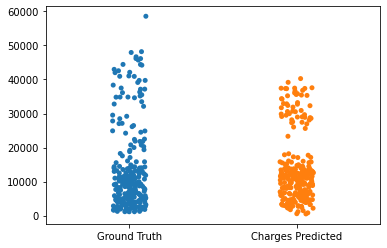

In [39]:
sns.stripplot(data=results)

Our Model will be able to predict charges till 20000 accurately

### **Train Accuracy: 74%**
### **Test Accuracy: 77%**